In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df=pd.read_excel("Electricity Pricing.xlsx")

In [3]:
df

,Time Period,Electricity Price
0,2019-01-01,7.67
1,2019-02-01,7.75
2,2019-03-01,7.82
3,2019-04-01,8.03
4,2019-05-01,8.95
5,2019-06-01,8.51
6,2019-07-01,8.80
7,2019-08-01,7.22
8,2019-09-01,7.11
9,2019-10-01,6.80


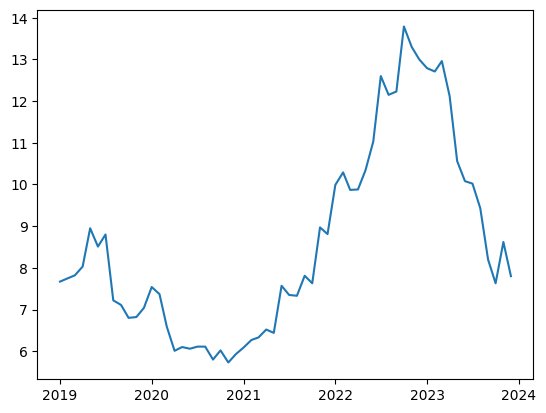

In [4]:
plt.plot(df['Time Period'],df['Electricity Price'])

In [6]:
df['Time Period'] = pd.to_datetime(df['Time Period'])
df = df.set_index('Time Period')
results = seasonal_decompose(df['Electricity Price'], model='multiplicative')

In [7]:
df

,Electricity Price
Time Period,
2019-01-01,7.67
2019-02-01,7.75
2019-03-01,7.82
2019-04-01,8.03
2019-05-01,8.95
2019-06-01,8.51
2019-07-01,8.80
2019-08-01,7.22
2019-09-01,7.11


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvs944odb/4ue5r3ct.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvs944odb/f06wgc_1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42824', 'data', 'file=/tmp/tmpvs944odb/4ue5r3ct.json', 'init=/tmp/tmpvs944odb/f06wgc_1.json', 'output', 'file=/tmp/tmpvs944odb/prophet_modelcxz_1v8v/prophet_model-20240226015255.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:52:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:52:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


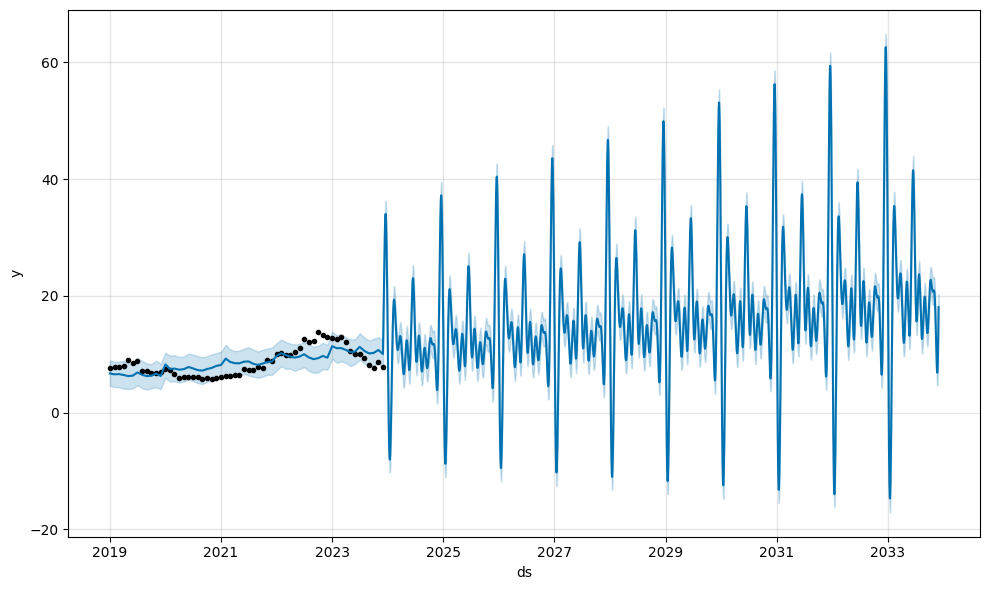

In [15]:
df=pd.read_excel("Electricity Pricing.xlsx")
df = df.rename(columns={'Time Period': 'ds', 'Electricity Price': 'y'})
m = Prophet(seasonality_mode='multiplicative').fit(df)
future = m.make_future_dataframe(periods=3652)
fcst = m.predict(future)
fig = m.plot(fcst)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvs944odb/p2z5b47t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvs944odb/vby1wdni.json
01:53:44 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=11130', 'data', 'file=/tmp/tmpvs944odb/p2z5b47t.json', 'init=/tmp/tmpvs944odb/vby1wdni.json', 'output', 'file=/tmp/tmpvs944odb/prophet_model3vztsp2t/prophet_model-20240226015344_1.csv', 'method=sample', 'num_samples=150', 'num_warmup=150', 'algorithm=hmc', 'a

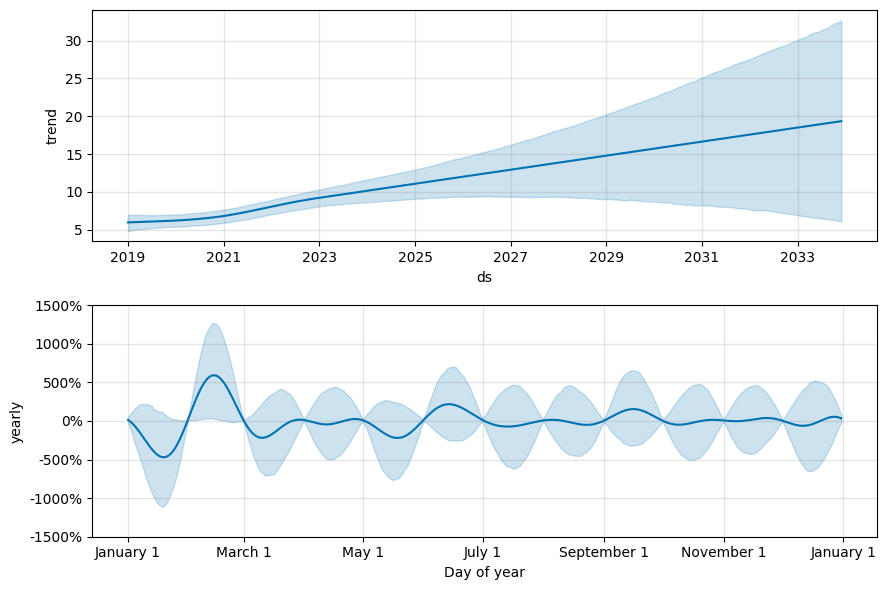

In [16]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=300).fit(df, show_progress=False)
fcst = m.predict(future)
fig = m.plot_components(fcst)

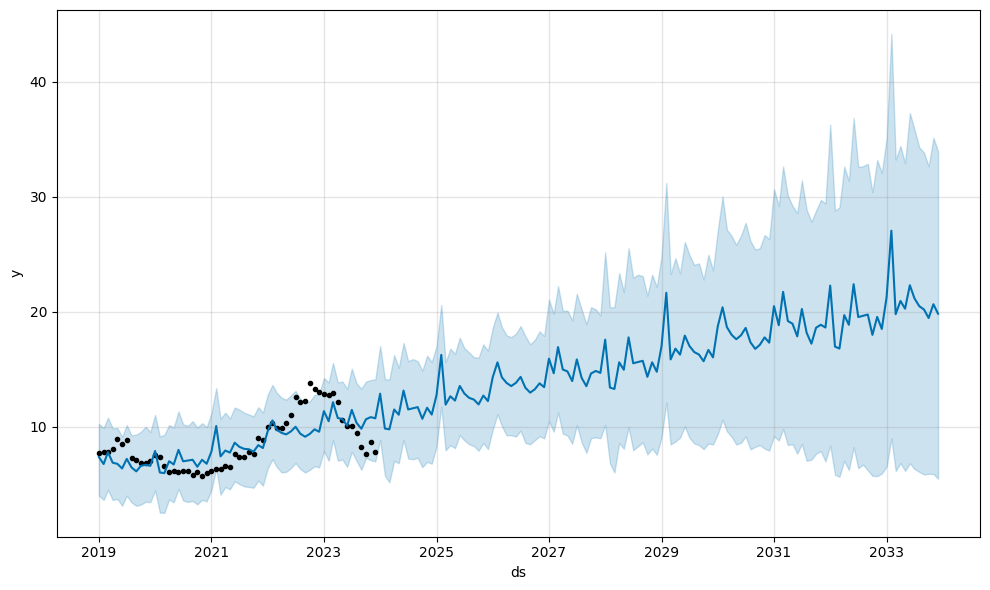

In [17]:
future = m.make_future_dataframe(periods=120, freq='MS')
fcst = m.predict(future)
fig = m.plot(fcst)

In [20]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,2033-08-01,20.477982,6.758994,34.277666
176,2033-09-01,20.180233,6.474758,34.494044
177,2033-10-01,19.444217,5.962760,33.792876
178,2033-11-01,20.643065,6.279006,35.923013
179,2033-12-01,19.818390,6.136272,34.419362


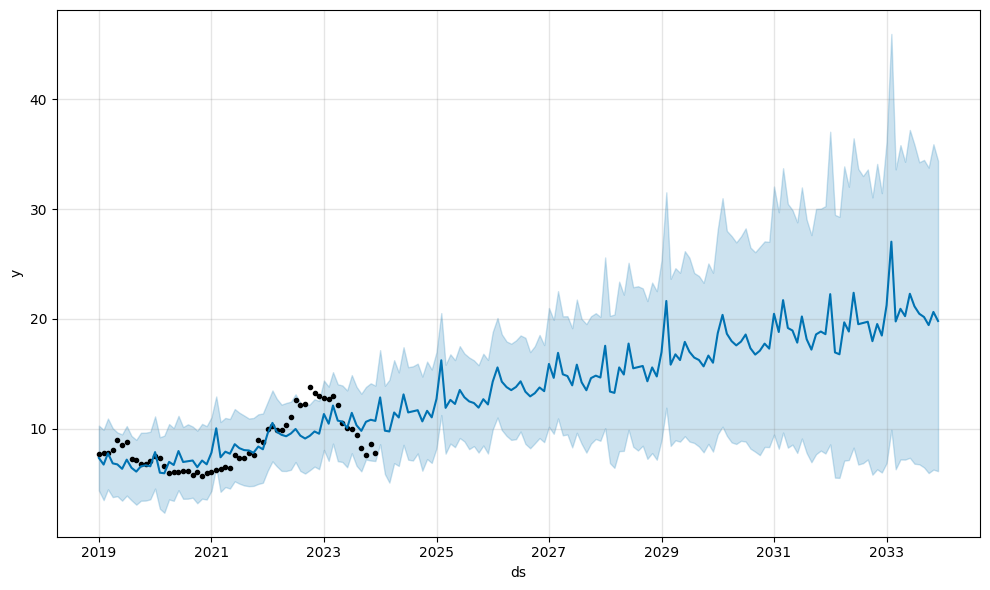

In [21]:
fig1 = m.plot(forecast)

In [22]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

In [23]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_excel('forecast_output.xlsx')